In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *

In [2]:
# df = pd.read_csv('C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\DRA008156\\2_groups\\clustered_NoNorm\\all_results.tsv', sep='\t')

df = pd.read_csv('/home/oliver/CRConedriveData/maaslin/DRA008156/2_groups/clustered_NoNorm/all_results.tsv', sep='\t') # for linux

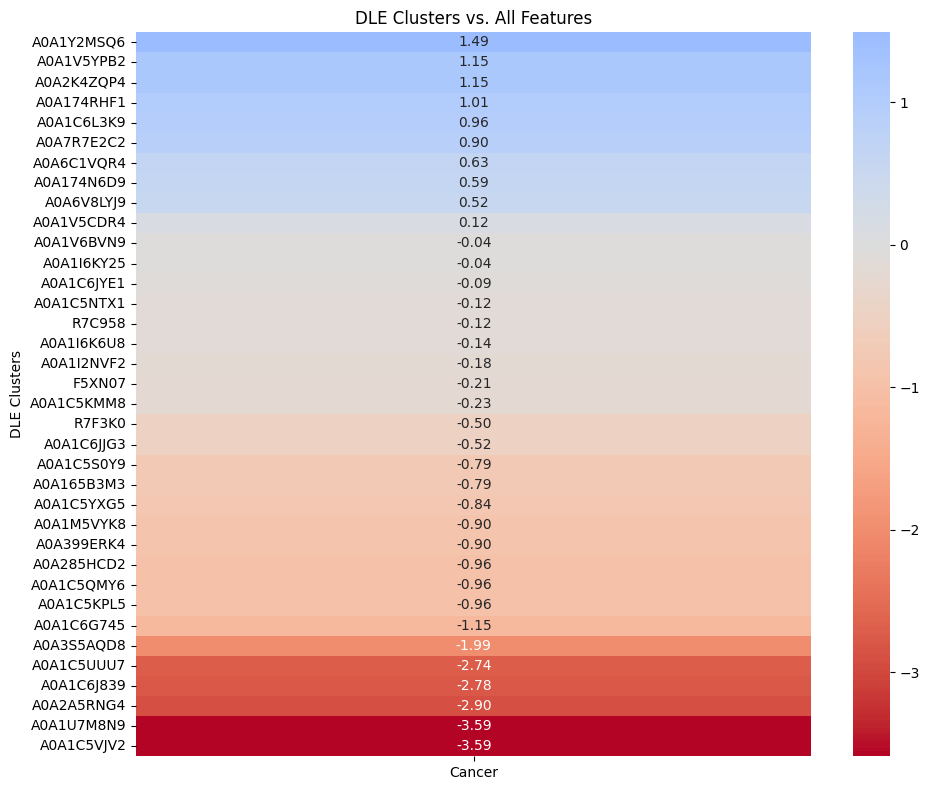

In [3]:
df = scale_values(df)

create_heatmap(df, 'DLE Clusters vs. All Features', '../../figures/heatmap_8156_test.png', 'Cancer')

In [ ]:
# df2 = pd.read_csv("C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\PRJEB7774_cluster\\Maaslin2ResultsNoNorm\\all_results.tsv", sep='\t')

df2 = pd.read_csv('/home/oliver/CRConedriveData/maaslin/PRJEB7774_cluster/Maaslin2ResultsNoNorm/all_results.tsv', sep='\t') # for linux

print(df2)

In [3]:
df2 = scale_values(df2)

In [ ]:
print(df2)

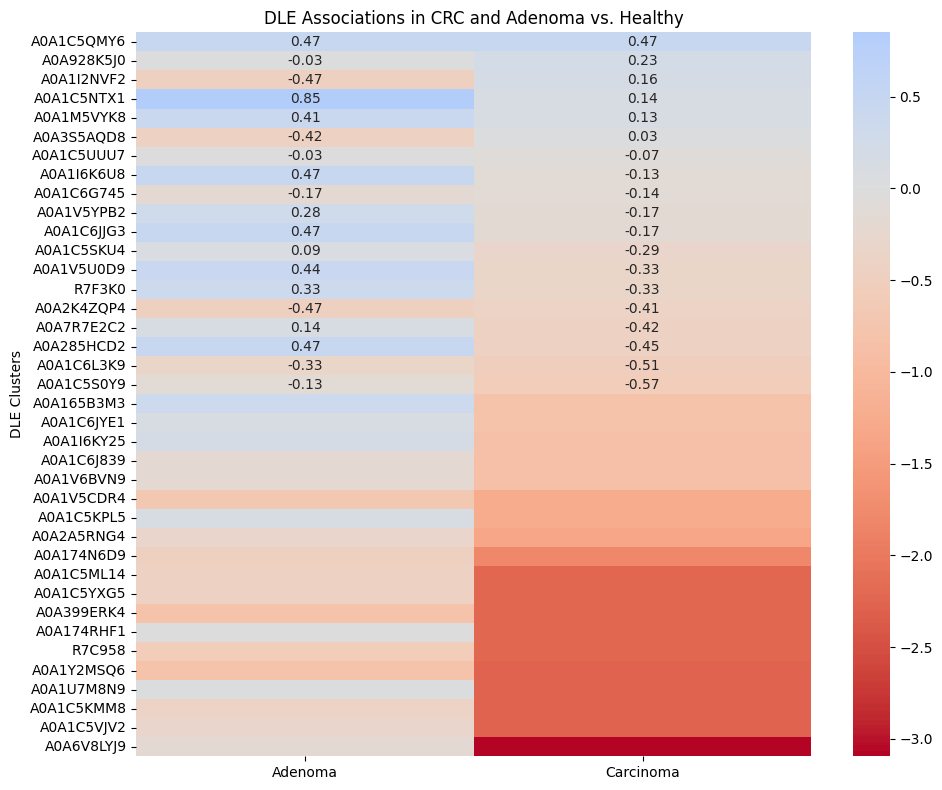

In [5]:
create_heatmap(df2, 'DLE Associations in CRC and Adenoma vs. Healthy', '../../figures/heatmap_7774_test.png', 'Carcinoma')

In [21]:
df = pd.read_csv('C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\DRA008156\\new_cluster\\no_clr\\all_results.tsv', sep='\t')

c:\Users\odesa\Desktop\Code\CRC-Final\src\clustering\functions.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['scaled_value'] = -np.log(dataframe['qval']) * np.sign(dataframe['coef'])


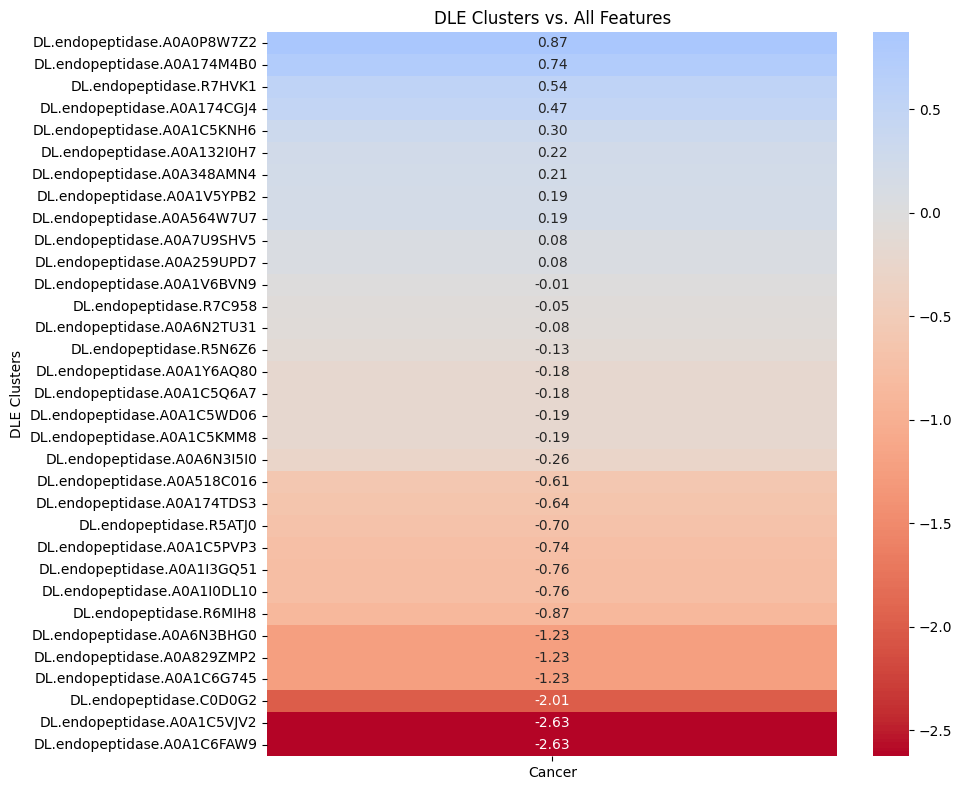

In [27]:
dl_df = df.loc[df['feature'].str.contains('DL.e')]

dl_df_scaled = scale_values(dl_df)

create_heatmap(dl_df_scaled, 'DLE Clusters vs. All Features', '../../figures/DL_heatmap_8156_new.png', 'Cancer')

c:\Users\odesa\Desktop\Code\CRC-Final\src\clustering\functions.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['scaled_value'] = -np.log(dataframe['qval']) * np.sign(dataframe['coef'])


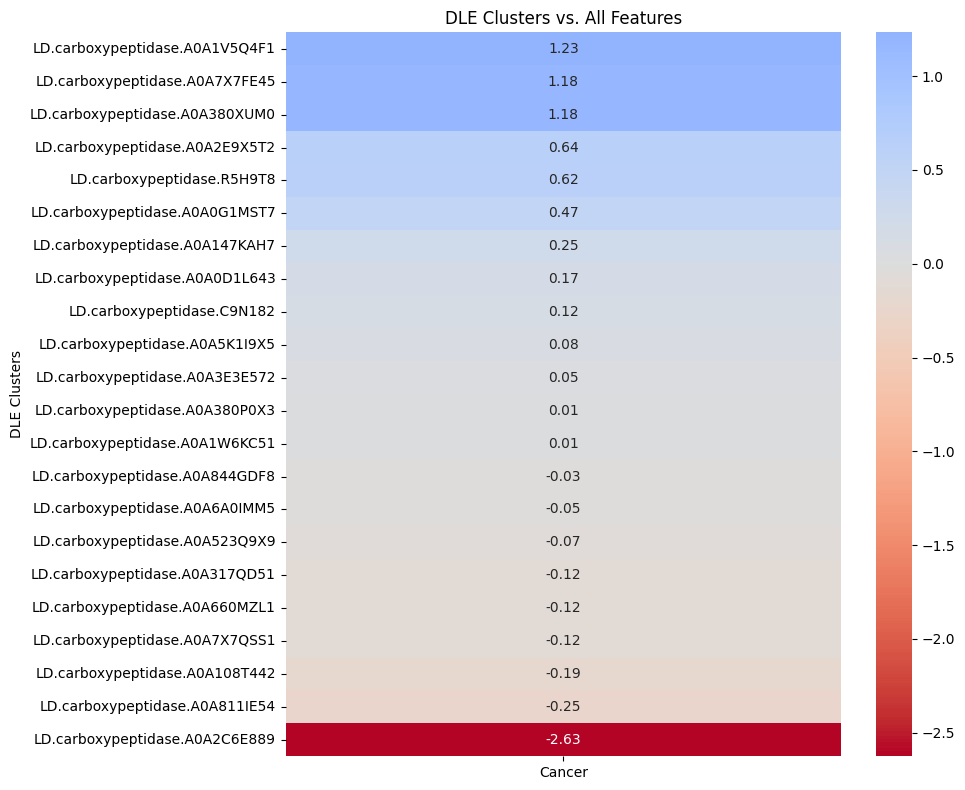

In [28]:
ldcarb_df = df.loc[df['feature'].str.contains('LD.carb')]

ldcarb_df_scaled = scale_values(ldcarb_df)

create_heatmap(ldcarb_df_scaled, 'DLE Clusters vs. All Features', '../../figures/LDcarb_heatmap_8156_new.png', 'Cancer')

In [ ]:
ddcarb_df = df.loc[df['feature'].str.contains('DD.carb')]

ddcarb_df_scaled = scale_values(ddcarb_df)

create_heatmap(ddcarb_df_scaled, 'DLE Clusters vs. All Features', '../../figures/DDcarb_heatmap_8156_new.png', 'Cancer')

**PRJEB7774**

In [33]:
df_7774 = pd.read_csv('C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\PRJEB7774\\new_cluster\\no_clr\\all_results.tsv', sep='\t')

print(df_7774.head())

                          feature      metadata      value          coef  \
0     DL.endopeptidase.A0A348AMN4  sample_title  Carcinoma -3.288188e-05   
1  DD.carboxypeptidase.A0A1A9C453  sample_title  Carcinoma -5.065935e-05   
2  DD.carboxypeptidase.A0A1S8L9Y7  sample_title  Carcinoma -5.290949e-05   
3  DD.carboxypeptidase.A0A8B5XJT8  sample_title  Carcinoma -6.558460e-05   
4      DD.carboxypeptidase.R7A918  sample_title  Carcinoma  4.569633e-07   

         stderr    N  N.not.0      pval      qval  
0  9.055579e-06  155      155  0.000385  0.055706  
1  1.463893e-05  155      155  0.000700  0.055706  
2  1.506731e-05  155      155  0.000587  0.055706  
3  1.793295e-05  155      155  0.000351  0.055706  
4  1.281627e-07  155       42  0.000486  0.055706  


c:\Users\odesa\Desktop\Code\CRC-Final\src\clustering\functions.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['scaled_value'] = -np.log(dataframe['qval']) * np.sign(dataframe['coef'])


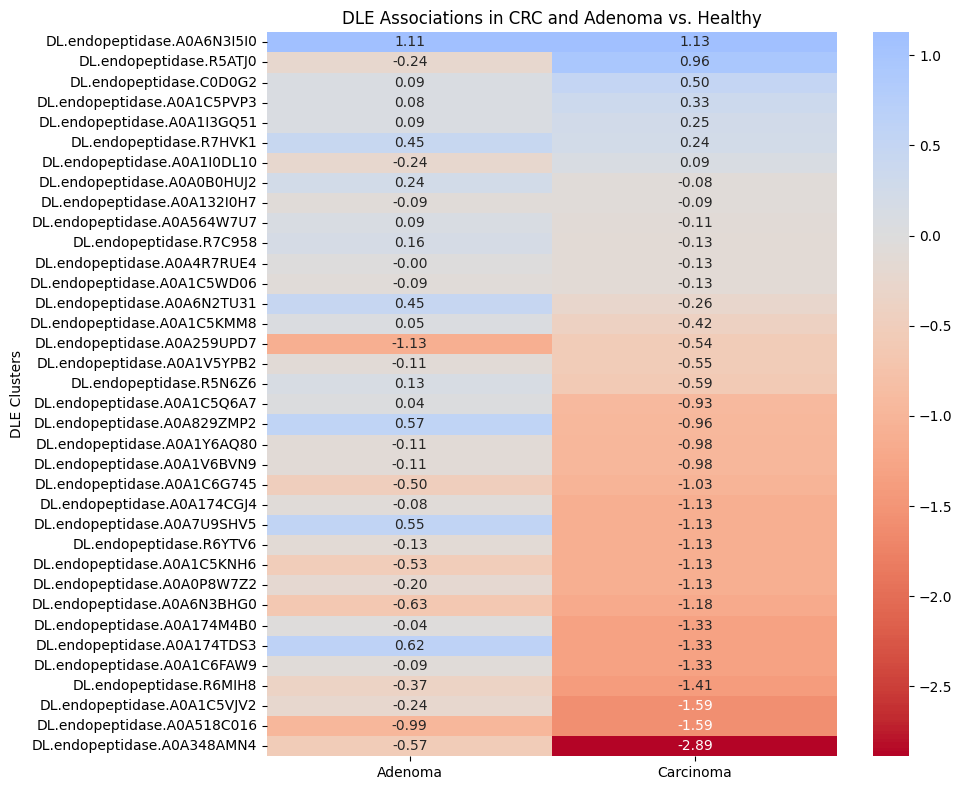

In [34]:
dl_df = df_7774.loc[df_7774['feature'].str.contains('DL.e')]

dl_df_scaled = scale_values(dl_df)

create_heatmap(dl_df_scaled, 'DLE Associations in CRC and Adenoma vs. Healthy', '../../figures/DL_heatmap_7774_new.png', 'Carcinoma')

In [ ]:
df_7774 = pd.read_csv('C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\PRJEB7774\\new_cluster\\clr\\all_results.tsv', sep='\t')

print(df_7774.head())

c:\Users\odesa\Desktop\Code\CRC-Final\src\clustering\functions.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['scaled_value'] = -np.log(dataframe['qval']) * np.sign(dataframe['coef'])


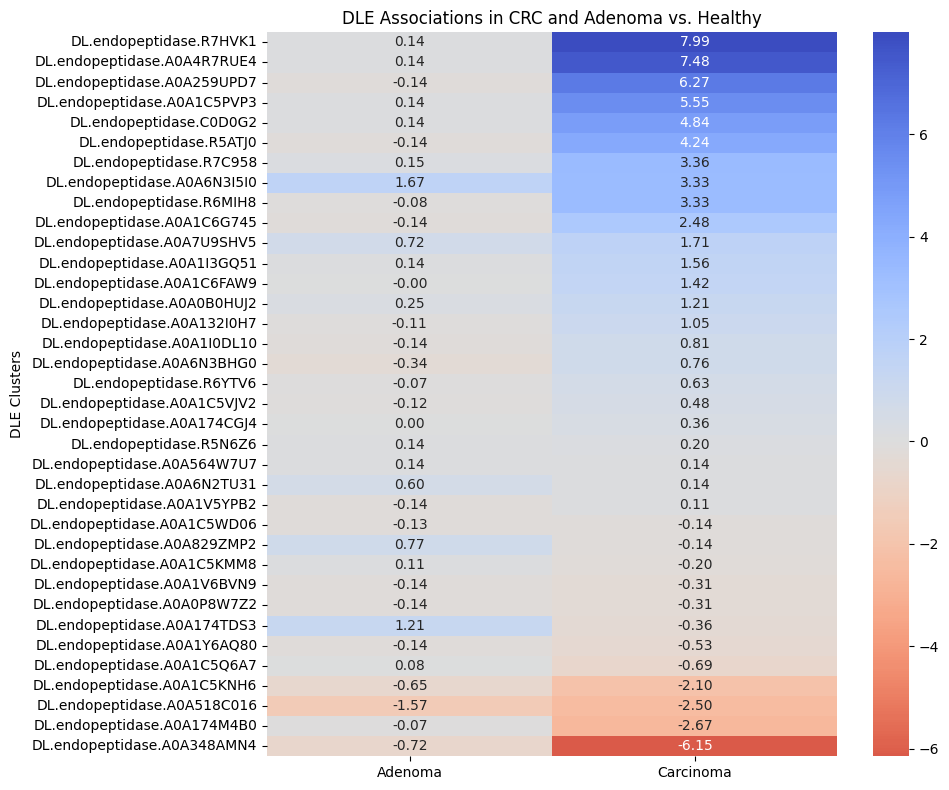

In [37]:
dl_df = df_7774.loc[df_7774['feature'].str.contains('DL.e')]

dl_df_scaled = scale_values(dl_df)

create_heatmap(dl_df_scaled, 'DLE Associations in CRC and Adenoma vs. Healthy', '../../figures/DL_heatmap_7774_new_clr.png', 'Carcinoma')

**Plotting Bariatric Data**

In [4]:
bariatric = pd.read_csv('/media/oliver/PGH_Backup/bariatric/grouped_bariatric.tsv', sep='\t')

bariatric_metadata = pd.read_csv('/media/oliver/PGH_Backup/bariatric/bariatric_metadata.tsv', sep='\t')

In [14]:
bariatric_metadata['unique_id'] = bariatric_metadata['sample_id'] + '_' + bariatric_metadata['TimePoint']

In [15]:
bariatric['unique_id'] = bariatric_metadata['unique_id']

In [16]:
merged_bariatric = pd.merge(bariatric, bariatric_metadata, on='unique_id')

In [ ]:

enzymes = ['DL-endopeptidase', 'LD-carboxypeptidase', 
           'LD-endopeptidase', 'Glucosaminidase',
           'DD-carboxypeptidase', 'Diadenylate',
           'Amidase', 'Muramidase']

order = ['BL', 'OR', '1M', '6M']  # Define the desired order of the x-axis

for enzyme in enzymes:    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=merged_bariatric, x='TimePoint', y=enzyme, showfliers=False, order=order)
    sns.stripplot(data=merged_bariatric, x='TimePoint', y=enzyme, color='black', alpha=0.5, order=order)

    plt.title(f'Relative Abundances of {enzyme} at Each Timepoint')
    plt.xlabel('Timepoint')
    plt.ylabel('Relative Abundance')
    plt.xticks(rotation=45)  # Ensure timepoint labels are not overlapping
    plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
    plt.show()

**Plotting Clustered ICI Data**

In [21]:
ici = pd.read_csv('/media/oliver/PGH_Backup/ICI/maaslin/PRJNA399742/Maaslin2ResultsNoNorm/all_results.tsv', sep='\t')

/home/oliver/CRC-Final/src/clustering/functions.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['scaled_value'] = -np.log(dataframe['qval']) * np.sign(dataframe['coef'])


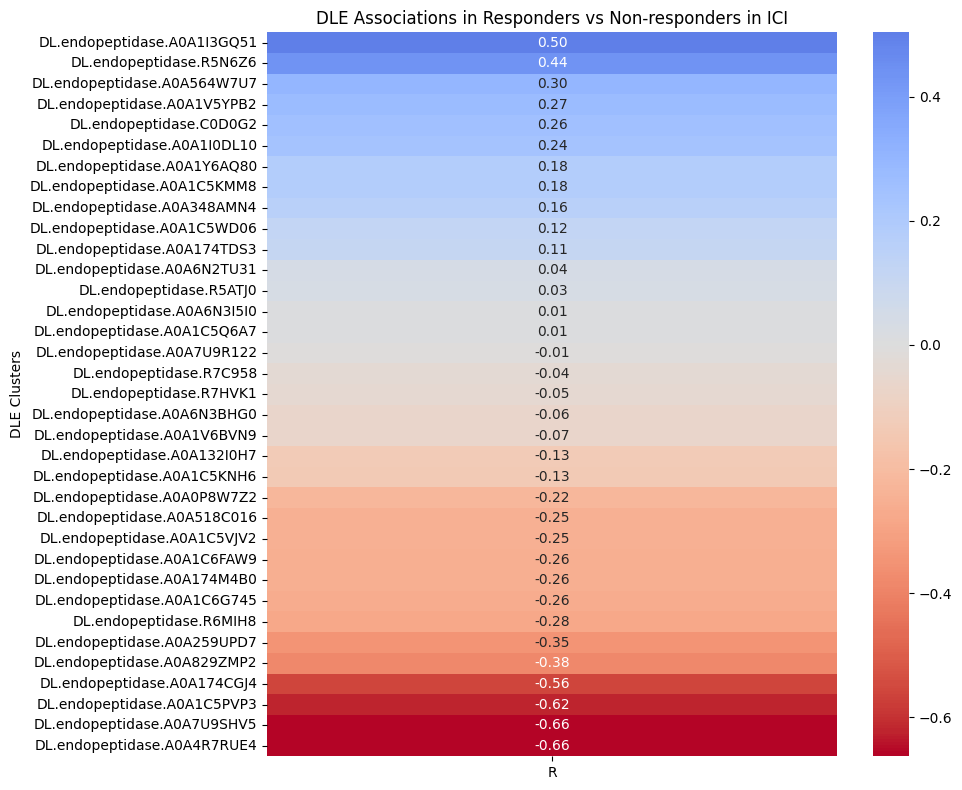

In [27]:
dl_df = ici.loc[ici['feature'].str.contains('DL.e')]

dl_df_scaled = scale_values(dl_df)

create_heatmap(dl_df_scaled, 'DLE Associations in Responders vs Non-responders in ICI', '../../figures/DL_heatmap_ici_399742.png', 'R')